In [368]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [369]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import interp

In [370]:
df = pd.read_csv('user_base.csv')

In [371]:
df.shape

(169, 22)

In [372]:
df.head()

Unnamed: 0                                              title  \
0           0                                                NaN   
1          12  ACompleteMachineLearningProjectWalkThroughinPy...   
2          25                          ACryptocoinYouWanttoSpend   
3          38    AFeatureSelectionToolforMachineLearninginPython   
4          55              AGuidetoBecomingaFullStackDeveloperin   

                  Author  Claps_max  topic_max  al_log_avg  \
0  Dovydas Reinikevicius    21000.0          0    0.819386   
1       William Koehrsen     8900.0          1    0.204970   
2            REMECoin.io     7600.0          0    1.752779   
3       William Koehrsen     3600.0          1    0.122830   
4        Daniel Borowski    48000.0          5    0.527692   

   author_loyalty_avg  comments_max  complex_max  days_open_max  \
0            2.400722            19    97.200000             62   
1            1.251257            14    87.352727             68   
2            7.000000             1    81.460000            171   
3            1.143520            13    75.483333             31   
4            1.938571            25    89.186667            478   

            ...            follwersa_max  ref_count_max  sent_max  tl_log_avg  \
0           ...                   2400.0              0  0.484110    2.425349   
1           ...                      0.0             23  0.076845    1.429189   
2           ...                   1000.0              6  0.000000    1.379545   
3           ...                      0.0             13  0.326617    1.300244   
4           ...                  11400.0             14  0.254243    1.329968   

   topic_loyalty_avg  success_avg  success_len  words_max  title_sent_max  \
0          12.791667     0.083333           12         74             0.0   
1           5.515385     0.153846           13        278             0.0   
2           4.384615     0.461538           13         47             0.0   
3           4.500000     0.176471           17        230             0.0   
4           4.358333     0.600000           10         53             0.0   

                  top_ref  
0                     NaN  
1  towardsdatascience.com  
2         www.remecoin.io  
3              github.com  
4       stackoverflow.com  

[5 rows x 22 columns]

In [373]:
df = df.drop('Unnamed: 0',axis = 1)

In [374]:
df.describe()

Claps_max   topic_max  al_log_avg  author_loyalty_avg  \
count     169.000000  169.000000  169.000000          169.000000   
mean    22835.982249    1.272189    0.642574            2.717522   
std     31330.567775    1.400424    0.649072            2.876044   
min       221.000000    0.000000    0.013805            1.014464   
25%      3800.000000    0.000000    0.153092            1.182148   
50%     10500.000000    1.000000    0.292213            1.383532   
75%     28000.000000    2.000000    0.955062            2.882547   
max    210000.000000    5.000000    2.563903           15.000000   

       comments_max  complex_max  days_open_max  figures_max  followinga_max  \
count    169.000000   168.000000     169.000000   169.000000      168.000000   
mean      25.976331    88.714455     146.923077     6.887574      295.386905   
std       44.457571    20.895339     266.602701     6.453526      906.633894   
min        0.000000    33.580000       9.000000     0.000000        0.000000   
25%        4.000000    78.965000      37.000000     2.000000        0.000000   
50%       17.000000    88.358750      74.000000     5.000000        1.000000   
75%       28.000000   101.118900     137.000000    10.000000       15.250000   
max      371.000000   162.510000    2163.000000    46.000000     7100.000000   

       follwersa_max  ref_count_max    sent_max  tl_log_avg  \
count     169.000000     169.000000  142.000000  169.000000   
mean    12808.627219       6.656805    0.330367    1.626674   
std     38255.027702       6.854827    0.209324    0.602098   
min         0.000000       0.000000   -1.000000    0.660682   
25%         0.000000       2.000000    0.222247    1.168259   
50%        36.000000       4.000000    0.324861    1.457610   
75%      5700.000000      10.000000    0.453680    2.161541   
max    203000.000000      52.000000    1.000000    3.053626   

       topic_loyalty_avg  success_avg  success_len    words_max  \
count         169.000000   169.000000   169.000000   169.000000   
mean            7.194071     0.172123    15.047337   259.591716   
std             4.546299     0.140066     6.250534   310.920741   
min             2.163636     0.000000    10.000000     0.000000   
25%             3.731818     0.066667    11.000000    45.000000   
50%             5.093651     0.166667    13.000000   128.000000   
75%            10.705333     0.250000    17.000000   352.000000   
max            22.083333     0.894737    51.000000  1403.000000   

       title_sent_max  
count           169.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

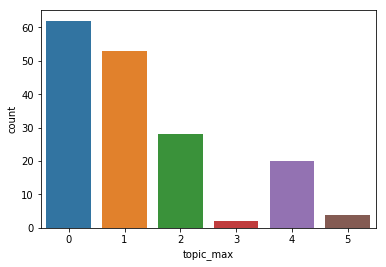

In [375]:
sb.countplot(df['topic_max'])

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


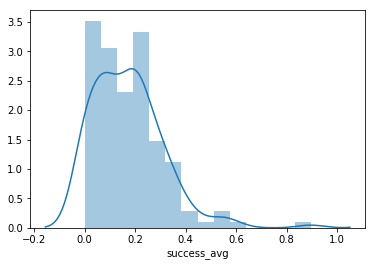

In [376]:
sb.distplot(df['success_avg'])

In [377]:
##Decide Cut-off
cut_off = .15
df['Success']=np.where((df['success_avg']>cut_off),1,0)

In [378]:
df['Success'].value_counts()

1    91
0    78
Name: Success, dtype: int64

In [382]:
df.columns

Index(['title', 'Author', 'Claps_max', 'topic_max', 'al_log_avg',
       'author_loyalty_avg', 'comments_max', 'complex_max', 'days_open_max',
       'figures_max', 'followinga_max', 'follwersa_max', 'ref_count_max',
       'sent_max', 'tl_log_avg', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max', 'top_ref', 'Success'],
      dtype='object')

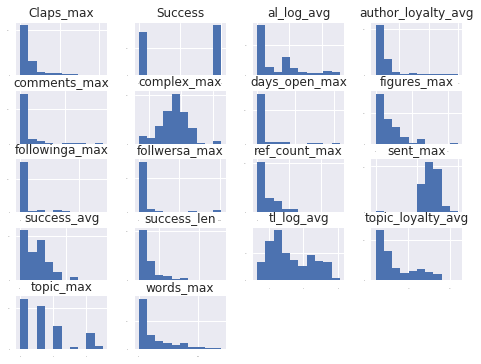

In [569]:
df.drop('title_sent_max',axis = 1).hist(sharex = False, sharey=False, xlabelsize = .5,ylabelsize = .5,figsize = (8,6))
plt.show()

In [188]:
#PCA
#PCA on Country
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def create_matrix(df,row_name,col_name,value_name):
    '''Creates a matrix needed for PCA.
    Enter row_name, and col_name as strings'''
    dataframe = df[[row_name,col_name]]
    matrix = pd.pivot_table(df,index = row_name,columns = col_name,values = value_name, aggfunc=np.mean,fill_value = 0)
    #print(matrix.shape)
    #matrix = matrix.drop_duplicates()
    #print(matrix.shape)
    #print(matrix.head())
    return matrix

def standardize(matrix):
    '''Takes in a matrix and returns a standaridzed matrix.'''
    scaler = StandardScaler().fit(matrix)
    rescaled_matrix = scaler.transform(matrix)
    return rescaled_matrix

#PCA
def PCA_analysis(matrix,rescaled_matrix,n_components):
    '''Takes rescaled matrix and runs initial PCA.
    Returns final df with PCA cols'''
    pca = PCA(n_components = n_components,svd_solver = 'auto')
    fit = pca.fit(rescaled_matrix)
    d2 = pca.transform(rescaled_matrix)
    #print(np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100))
    d2_df = pd.DataFrame(d2)
    d2_df.index = pd.DataFrame(data=matrix).index
    col_headers = []
    for x in range(n_components):
        col_headers.append('PC'+str(x+1))
    d2_df.columns = col_headers
    #Plot 100 components
    pca_big = PCA(n_components=80)
    fit_big = pca_big.fit_transform(rescaled_matrix)
    var = np.cumsum(np.round(pca_big.explained_variance_ratio_,decimals=5)*100)
    #print(var)
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Analysis')
    plt.ylim(0,100.5)
    plt.style.context('seaborn-whitegrid')
    plt.plot(var)
    return d2_df

#Put it all together
def agg_PCA(df,row_name,col_name,value_name,n_components):
    m = create_matrix(df,row_name,col_name,value_name)
    rm = standardize(m)
    df_final = PCA_analysis(m,rm,n_components)
    
    return df_final

def PCA_merge(data,pca1,pca2):
    data = pd.merge(data, pca1, how='left', left_on='artist_name', left_index=False, right_index=True)
    data = pd.merge(data, pca2, how='left', left_on='artist_name', left_index=False, right_index=True)
    return data
# call the functions
#rc_pca_df = agg_PCA(df,'Company_Name','',10)
#pl_pca_df = agg_PCA(data,'artist_name','playlist_id',20)
#data = PCA_merge(data,rc_pca_df,pl_pca_df)

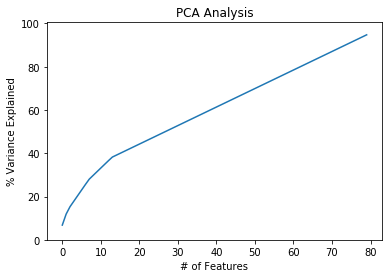

In [397]:
author_pca=agg_PCA(df,'Author','title','success_avg',10)

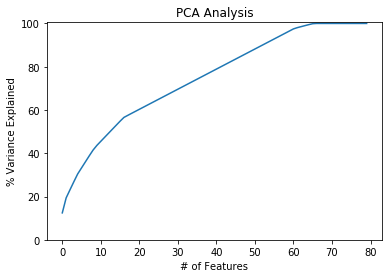

In [398]:
ref_pca=agg_PCA(df,'top_ref','title','success_avg',10)

In [399]:
data = df.merge(author_pca, left_on = 'Author',right_index = True,how = 'left')

In [400]:
data.shape

(169, 32)

In [401]:
data = data.merge(ref_pca, left_on ='top_ref',right_index = True, how = 'left')

In [402]:
data.shape

(169, 42)

In [403]:
data.columns

Index(['title', 'Author', 'Claps_max', 'topic_max', 'al_log_avg',
       'author_loyalty_avg', 'comments_max', 'complex_max', 'days_open_max',
       'figures_max', 'followinga_max', 'follwersa_max', 'ref_count_max',
       'sent_max', 'tl_log_avg', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max', 'top_ref', 'Success',
       'PC1_x', 'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x',
       'PC9_x', 'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y',
       'PC7_y', 'PC8_y', 'PC9_y', 'PC10_y'],
      dtype='object')

In [404]:
data['log_claps']=data['Claps_max'].apply(np.log)

In [405]:
from sklearn.preprocessing import Imputer
data['sent_max']=data['sent_max'].fillna(0)
data['complex_max']=data['complex_max'].fillna(0)
data['followinga_max']=data['followinga_max'].fillna(0)
data['follwersa_max']=data['follwersa_max'].fillna(0)
fix = Imputer(missing_values = 0, strategy = 'median',axis = 0).fit_transform(data[['followinga_max','follwersa_max','sent_max','complex_max']])
fix = pd.DataFrame(fix,columns = ['following','followers','sent','complex'])

In [406]:
data = data.merge(fix,left_index = True, right_index = True)
data = data.drop(['followinga_max','follwersa_max','sent_max','complex_max'],axis = 1)

In [407]:
data.shape

(169, 43)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


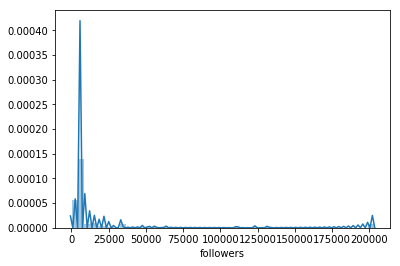

In [408]:
sb.distplot(data['followers'])

In [409]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

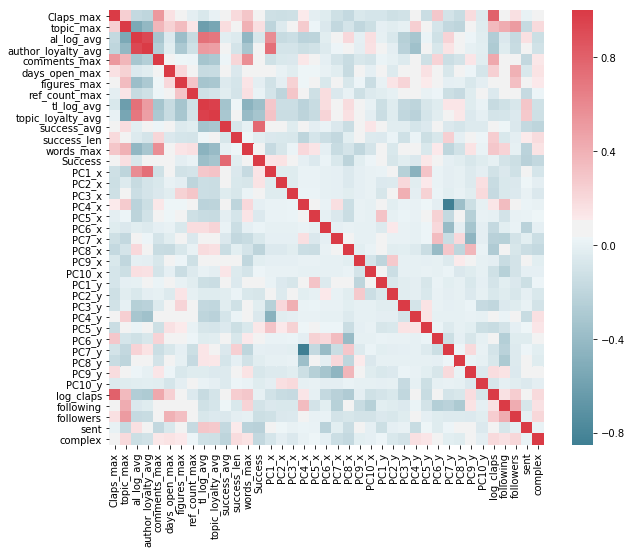

In [410]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop('title_sent_max',axis = 1).corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [411]:
data = data.drop(['author_loyalty_avg','topic_loyalty_avg','Claps_max'],axis = 1)

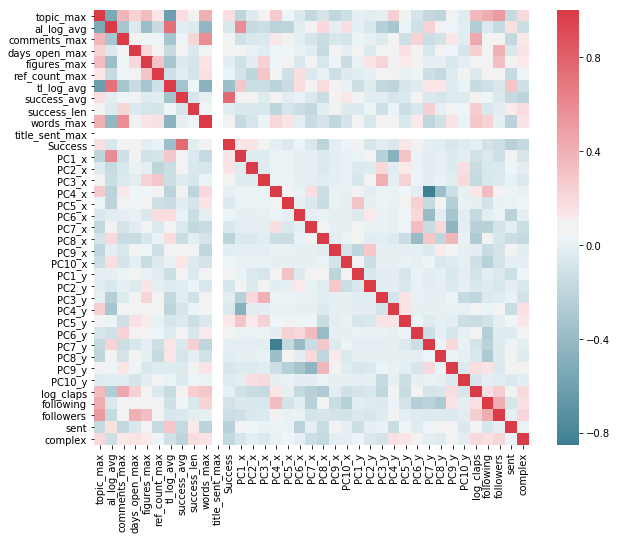

In [412]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [413]:
data = data.drop(['success_len','success_avg'],axis = 1)

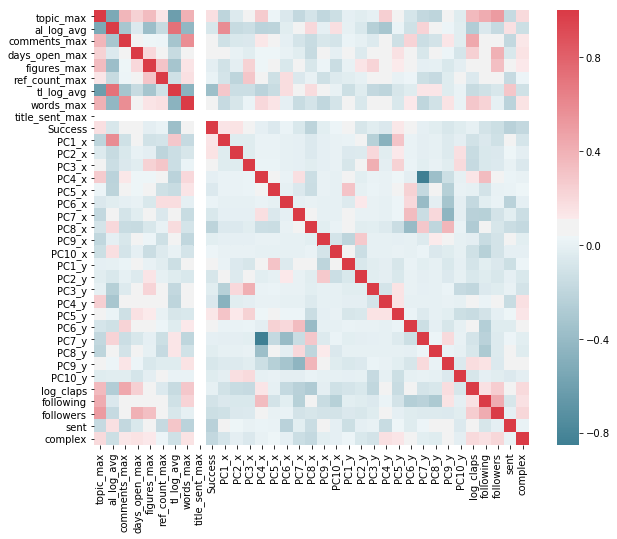

In [414]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [415]:
data.Success.value_counts()

1    91
0    78
Name: Success, dtype: int64

In [416]:
data.columns

Index(['title', 'Author', 'topic_max', 'al_log_avg', 'comments_max',
       'days_open_max', 'figures_max', 'ref_count_max', 'tl_log_avg',
       'words_max', 'title_sent_max', 'top_ref', 'Success', 'PC1_x', 'PC2_x',
       'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x', 'PC10_x',
       'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y', 'PC8_y',
       'PC9_y', 'PC10_y', 'log_claps', 'following', 'followers', 'sent',
       'complex'],
      dtype='object')

In [417]:
data = data.drop('title_sent_max',axis = 1)

In [418]:
logs = data[['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex']]
logs = (logs+0.1).apply(np.log)
logs.columns = ['l_comments','l_days','l_figs','l_ref_count','l_words','l_followers','l_following','l_sent','l_complex']
data = data.merge(logs, left_index = True, right_index = True)
data=data.drop(['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex'],axis =1)
data.shape

(169, 37)

In [419]:
data.describe()

topic_max  al_log_avg  tl_log_avg     Success       PC1_x       PC2_x  \
count  169.000000  169.000000  169.000000  169.000000  159.000000  159.000000   
mean     1.272189    0.642574    1.626674    0.538462    1.091531    0.990278   
std      1.400424    0.649072    0.602098    0.500000    6.218225    5.374862   
min      0.000000    0.013805    0.660682    0.000000   -0.976781   -0.621682   
25%      0.000000    0.153092    1.168259    0.000000   -0.318197   -0.306907   
50%      1.000000    0.292213    1.457610    1.000000   -0.272298   -0.244906   
75%      2.000000    0.955062    2.161541    1.000000   -0.272298   -0.244906   
max      5.000000    2.563903    3.053626    1.000000   28.012953   24.249520   

            PC3_x         PC4_x         PC5_x         PC6_x     ...      \
count  159.000000  1.590000e+02  1.590000e+02  1.590000e+02     ...       
mean     0.675305 -1.512723e-01 -1.461578e-01  9.927900e-03     ...       
std      4.121601  2.764213e+00  2.498993e+00  3.080041e+00     ...       
min     -0.581693 -1.110317e+01 -3.873181e+00 -8.235193e+00     ...       
25%     -0.190173 -3.743533e-15  6.314393e-16 -1.137979e-15     ...       
50%     -0.190173 -1.405126e-16  6.765422e-15  1.956768e-15     ...       
75%     -0.142288  2.319325e-15  6.841749e-15  3.358425e-15     ...       
max     19.799529  1.202615e+01  1.549272e+01  1.428128e+01     ...       

        log_claps  l_comments      l_days      l_figs  l_ref_count  \
count  169.000000  169.000000  169.000000  169.000000   169.000000   
mean     9.222968    2.031549    4.315897    1.533908     1.367746   
std      1.354474    2.141426    1.044026    0.975910     1.253692   
min      5.398163   -2.302585    2.208274   -2.302585    -2.302585   
25%      8.242756    1.410987    3.613617    0.741937     0.741937   
50%      9.259131    2.839078    4.305416    1.629241     1.410987   
75%     10.239960    3.335770    4.920711    2.312535     2.312535   
max     12.254863    5.916472    7.679298    3.830813     3.953165   

          l_words  l_followers  l_following      l_sent   l_complex  
count  169.000000   169.000000   169.000000  168.000000  169.000000  
mean     4.672117     8.486586     2.888131   -0.877440    4.456304  
std      1.592478     1.553403     2.066636    0.375149    0.256380  
min     -2.302585     3.586293     0.095310   -2.193389    3.516904  
25%      3.808882     8.476392     1.960095   -1.036613    4.371850  
50%      4.852811     8.612522     2.312535   -0.850312    4.482536  
75%      5.863915     8.648239     2.714695   -0.644357    4.616260  
max      7.246439    12.220962     8.867864    0.095310    5.091355  

[8 rows x 34 columns]

In [420]:
data.dtypes

title           object
Author          object
topic_max        int64
al_log_avg     float64
tl_log_avg     float64
top_ref         object
Success          int64
PC1_x          float64
PC2_x          float64
PC3_x          float64
PC4_x          float64
PC5_x          float64
PC6_x          float64
PC7_x          float64
PC8_x          float64
PC9_x          float64
PC10_x         float64
PC1_y          float64
PC2_y          float64
PC3_y          float64
PC4_y          float64
PC5_y          float64
PC6_y          float64
PC7_y          float64
PC8_y          float64
PC9_y          float64
PC10_y         float64
log_claps      float64
l_comments     float64
l_days         float64
l_figs         float64
l_ref_count    float64
l_words        float64
l_followers    float64
l_following    float64
l_sent         float64
l_complex      float64
dtype: object

In [421]:
data.isnull().sum()

title          16
Author          0
topic_max       0
al_log_avg      0
tl_log_avg      0
top_ref        14
Success         0
PC1_x          10
PC2_x          10
PC3_x          10
PC4_x          10
PC5_x          10
PC6_x          10
PC7_x          10
PC8_x          10
PC9_x          10
PC10_x         10
PC1_y          22
PC2_y          22
PC3_y          22
PC4_y          22
PC5_y          22
PC6_y          22
PC7_y          22
PC8_y          22
PC9_y          22
PC10_y         22
log_claps       0
l_comments      0
l_days          0
l_figs          0
l_ref_count     0
l_words         0
l_followers     0
l_following     0
l_sent          1
l_complex       0
dtype: int64

In [422]:
data = data.fillna(0)

In [423]:
data = data.drop(['top_ref'],axis = 1)

In [465]:
data.Success.value_counts()

1    91
0    78
Name: Success, dtype: int64

In [463]:
# Class balance
from sklearn.utils import resample

# succ_rat: 0.0 - 1.0
# if 0.6, 60% of final data would be succ
def up_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    
    data_upped = resample(data_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ) * succ_rat) / (1 - succ_rat)))
    data_upped_ns = resample(data_not_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ))))
    
    data_out = pd.concat([data_upped, data_upped_ns])
    print('Upsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

def dn_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    data_downed = resample(data_not_succ,
                          replace = True,
                          n_samples = int((len(data_succ) * (1 - succ_rat))/succ_rat))
    
    data_out = pd.concat([data_succ, data_downed])
    print('\n Downsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

In [464]:
us = up_succ(data,.5)
ds = dn_succ(data,.5)

Upsampled data
Success
0    39
1    39
Name: Success, dtype: int64

 Downsampled data
Success
0    91
1    91
Name: Success, dtype: int64


In [467]:
# Separate majority and minority classes
df_majority = data[data.Success==1]
df_minority = data[data.Success==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=91,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Success.value_counts()

1    91
0    91
Name: Success, dtype: int64

In [468]:
X = df_upsampled.drop(['Success','title','Author'],axis = 1)
X.index = df_upsampled[['title','Author']]
Y = df_upsampled['Success']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train,Y_validation=train_test_split(X,Y,test_size = validation_size, random_state = seed)

In [469]:
def get_eval_ROC(model,X,Y):
    # This will evaluate traning result
    # and present results as the ROC curve
    # X,Y from training set
    kfold = KFold(n_splits=5, random_state=7)
    base_fpr = np.linspace(0, 1, 101)
    
    title = "Model: "+ str(model).split('(')[0]
    plt.figure(figsize=(5, 5))
    plt.title(title)
    
    results = []
    X = np.array(X)
    Y = np.array(Y)
    for i, (train, test) in enumerate(kfold.split(X)):
        y_score = model.fit(X[train], Y[train]).predict_proba(X[test])
        fpr, tpr, _ = roc_curve(Y[test], y_score[:, 1])
        plt.plot(fpr, tpr, 'b', alpha=0.15)
        tpr = interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        results.append(tpr)

    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)
    
    res_upper = np.minimum(mean_results + std, 1)
    res_lower = mean_results - std
    print(title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f\n" % (tpr.mean(), fpr.mean()))
    plt.plot(base_fpr, mean_results, 'b')
    plt.fill_between(base_fpr, res_lower, res_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')

In [470]:
def get_val_ROC(model, train, test, y_train, y_test): 
    # make prediction and calculate the ROC
    base_fpr = np.linspace(0, 1, 101)
    title = "Model: "+ str(model).split('(')[0]
    results = []
    x_train = np.array(train)
    y_train = np.array(y_train)
    x_test = np.array(test)
    y_test = np.array(y_test)
    
    y_score = model.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    results.append(tpr)
    
    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)
    
     # plotting
    plt.figure(figsize=(5, 5))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8) #baseline
    plt.plot(*roc_curve(y_test, y_score[:,1])[:2])
    print('\n',title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f" % (tpr.mean(), fpr.mean()))
    res = results.mean()
    return res

In [536]:
def get_cm(model,x_train, y_train, x_test,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    matrix = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    print("Accuracy:"+str(accuracy))
    tn,fp,fn,tp = matrix.ravel()
    
    title = str(model).split('(')[0]
    print('Model:'+title)
    sb.set(font_scale = 1)
    sb.heatmap(matrix,annot = True, fmt = 'g', annot_kws={'size':16})

Model: LogisticRegression
ROC: 0.742 (0.238)
True Positive Rate: 0.697 , False Positive Rate: 0.487

Model: KNeighborsClassifier
ROC: 0.661 (0.306)
True Positive Rate: 0.668 , False Positive Rate: 0.564

Model: DecisionTreeClassifier
ROC: 0.723 (0.276)
True Positive Rate: 0.695 , False Positive Rate: 0.410

Model: GaussianNB
ROC: 0.722 (0.285)
True Positive Rate: 0.691 , False Positive Rate: 0.508



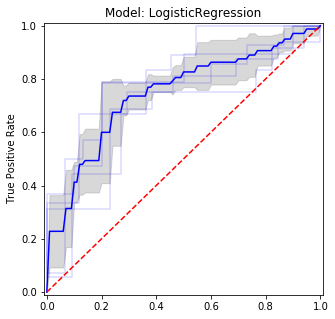

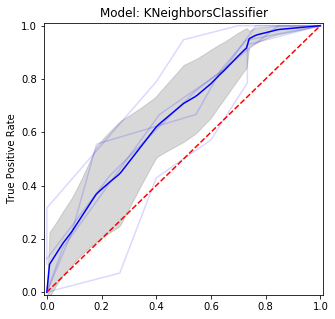

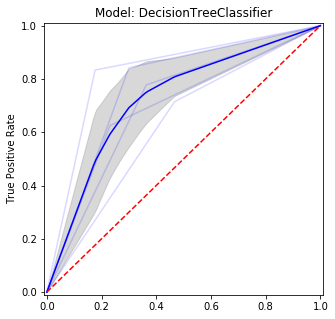

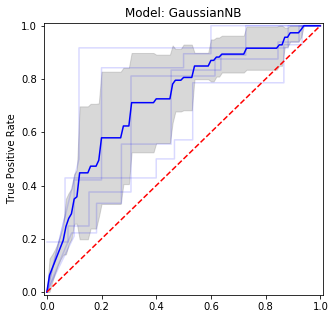

In [471]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
for name,model in models:
    get_eval_ROC(model,X_train,Y_train)

Model: Pipeline
ROC: 0.733 (0.257)
True Positive Rate: 0.688 , False Positive Rate: 0.456

Model: Pipeline
ROC: 0.742 (0.260)
True Positive Rate: 0.809 , False Positive Rate: 0.462

Model: Pipeline
ROC: 0.709 (0.288)
True Positive Rate: 0.626 , False Positive Rate: 0.436

Model: Pipeline
ROC: 0.722 (0.285)
True Positive Rate: 0.691 , False Positive Rate: 0.508



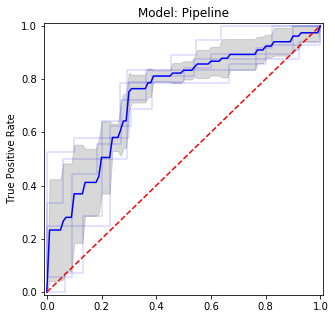

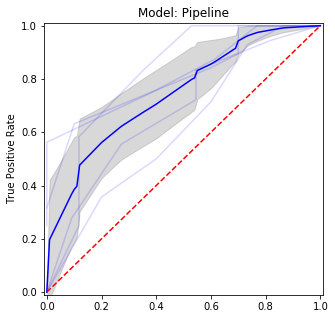

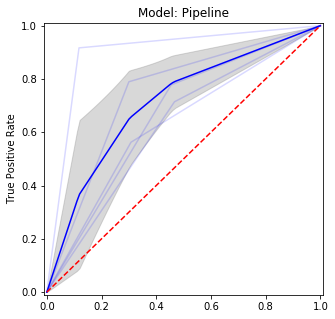

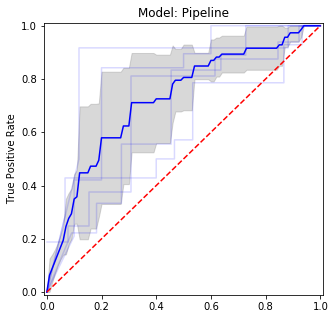

In [472]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    get_eval_ROC(model,X_train,Y_train)


Model: AdaBoostClassifier
ROC: 0.762 (0.296)
True Positive Rate: 0.582 , False Positive Rate: 0.543

Model: GradientBoostingClassifier
ROC: 0.848 (0.252)
True Positive Rate: 0.778 , False Positive Rate: 0.357

Model: RandomForestClassifier
ROC: 0.822 (0.273)
True Positive Rate: 0.744 , False Positive Rate: 0.378

Model: ExtraTreesClassifier
ROC: 0.828 (0.263)
True Positive Rate: 0.818 , False Positive Rate: 0.385



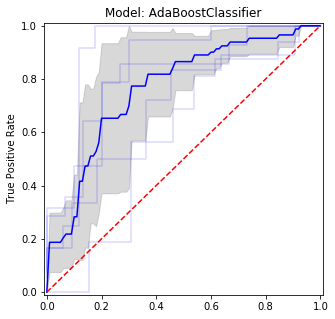

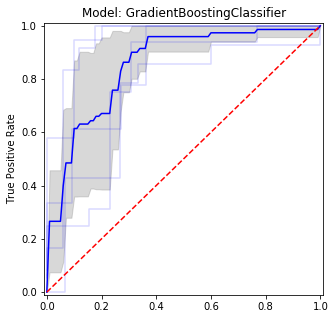

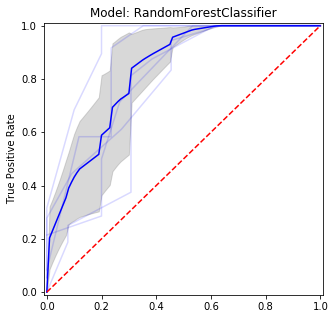

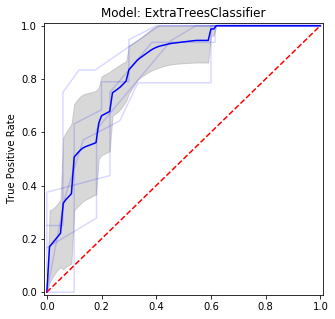

In [473]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    get_eval_ROC(model,X_train,Y_train)


 Model: LogisticRegression
ROC: 0.694 (0.147)
True Positive Rate: 0.694 , False Positive Rate: 0.527

 Model: KNeighborsClassifier
ROC: 0.571 (0.223)
True Positive Rate: 0.571 , False Positive Rate: 0.533

 Model: DecisionTreeClassifier
ROC: 0.955 (0.172)
True Positive Rate: 0.955 , False Positive Rate: 0.360

 Model: GaussianNB
ROC: 0.724 (0.225)
True Positive Rate: 0.724 , False Positive Rate: 0.427


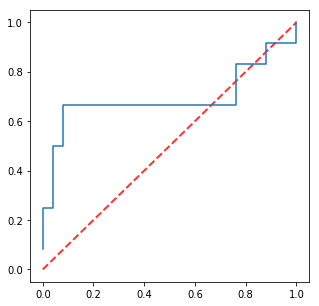

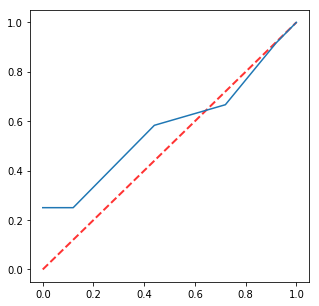

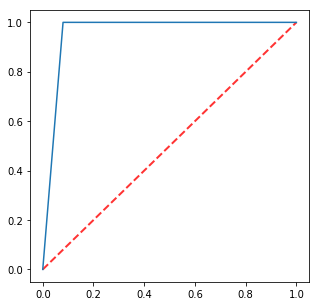

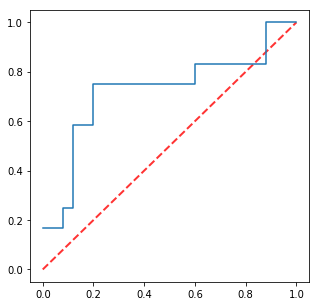

In [478]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
for name,model in models:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)


 Model: AdaBoostClassifier
ROC: 0.904 (0.124)
True Positive Rate: 0.904 , False Positive Rate: 0.378

 Model: GradientBoostingClassifier
ROC: 0.969 (0.109)
True Positive Rate: 0.969 , False Positive Rate: 0.406

 Model: RandomForestClassifier
ROC: 0.927 (0.162)
True Positive Rate: 0.927 , False Positive Rate: 0.297

 Model: ExtraTreesClassifier
ROC: 0.958 (0.173)
True Positive Rate: 0.958 , False Positive Rate: 0.191


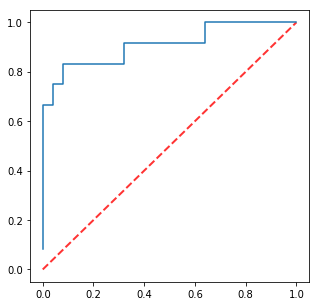

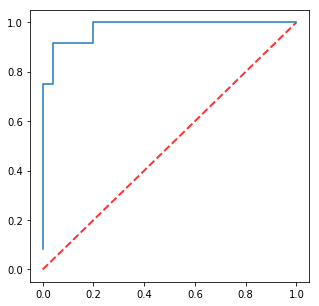

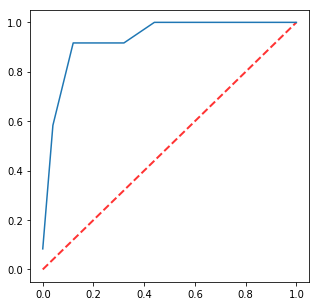

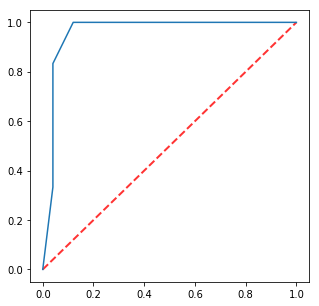

In [479]:

for name,model in ensembles:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)

In [474]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
def knngridsearch(range_max,X,Y):
    # define the parameter values that should be searched
    # for python 2, k_range = range(1, 31)
    k_range = list(range(1, range_max))
    print(k_range)
    # create a parameter grid: map the parameter names to the values that should be searched
    # simply a python dictionary
    # key: parameter name
    # value: list of values that should be searched for that parameter
    # single key-value pair for param_grid
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    # instantiate the grid
    knn = KNeighborsClassifier(n_neighbors = 5)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
    # fit the grid with data
    grid.fit(X, Y)
    grid.grid_scores_
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    plt.plot(k_range,grid_mean_scores)
    plt.xlabel('Value for K for KNN')
    plt.ylabel('Cross-Validated Accuracy') 
    print('Best params: ', grid.best_params_)
    print('Best score: ', grid.best_score_)
    return grid.best_estimator_

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
[0.6568760262725779, 0.6660919540229885, 0.6739326765188832, 0.6784688013136289, 0.6699302134646963, 0.6807471264367816, 0.6925492610837438, 0.6775451559934319, 0.6518062397372743, 0.645956486042693, 0.6240147783251231, 0.6016830870279146, 0.5948275862068966, 0.5819376026272577]
Best params:  {'n_neighbors': 7}
Best score:  0.6925492610837438
Model: KNeighborsClassifier
ROC: 0.652 (0.343)
True Positive Rate: 0.683 , False Positive Rate: 0.473



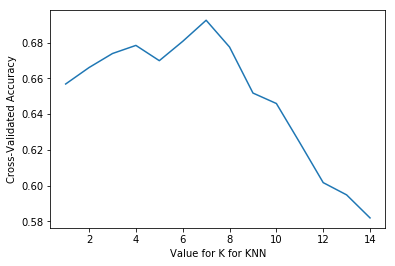

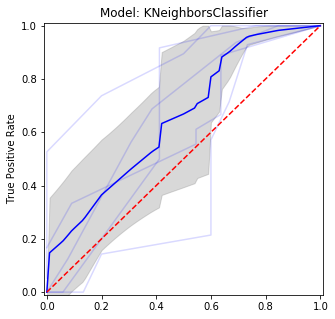

In [475]:
get_eval_ROC(knngridsearch(15,X_train,Y_train),X_train,Y_train)

In [476]:
def randomforestgrid(X,Y):
    rfc = RandomForestClassifier() 
    # Use a grid over parameters of interest
    param_grid = { 
               "n_estimators" : [9, 18, 20],
               "max_depth" : [1, 5, 10, 15],
               "min_samples_leaf" : [1, 2, 4]} 
    print('\n-------------------------')
    print('Starting grid search')
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring='roc_auc')
    print('fitting')
    CV_rfc.fit(X, Y)
    print('grid search done')
    print('Best params: ', CV_rfc.best_params_)
    print('Best score: ', CV_rfc.best_score_)
    return CV_rfc.best_estimator_


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 18}
Best score:  0.8799261083743843
Model: RandomForestClassifier
ROC: 0.848 (0.250)
True Positive Rate: 0.875 , False Positive Rate: 0.245



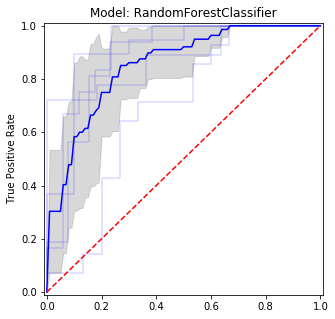

In [477]:
get_eval_ROC(randomforestgrid(X_train,Y_train),X_train,Y_train)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 20}
Best score:  0.8757389162561576

 Model: RandomForestClassifier
ROC: 0.921 (0.180)
True Positive Rate: 0.921 , False Positive Rate: 0.380


0.9207920792079208

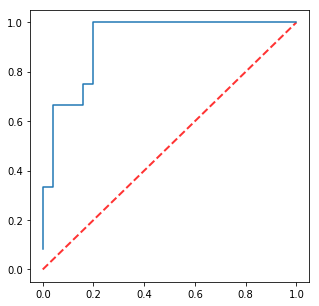

In [480]:
get_val_ROC(randomforestgrid(X_train,Y_train),X_train,X_validation,Y_train,Y_validation)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}
Best score:  0.8789203612479475
Accuracy:0.918918918918919
Model:RandomForestClassifier


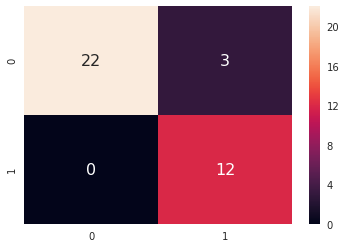

In [537]:
get_cm(randomforestgrid(X_train,Y_train),X_train,Y_train,X_validation,Y_validation)

In [481]:
def select_features(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    clf = ExtraTreesClassifier()
    clf = clf.fit(X, y)
    print(clf.feature_importances_ )
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [482]:
def select_features_rf(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    rf = RandomForestClassifier()
    rf = rf.fit(X, y)
    print(rf.feature_importances_ )
    model = SelectFromModel(rf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [483]:
def select_features_lr(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = LogisticRegression()
    lr = lr.fit(X, y)
    print(lr.coef_ )
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [484]:
def select_features_gb(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = GradientBoostingClassifier()
    lr = lr.fit(X, y)
    print(lr.feature_importances_)
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [485]:
X_new = select_features(X_train,Y_train)

previous shape:  (145, 33)
[0.03850586 0.07154206 0.0824656  0.03020633 0.03404896 0.03830456
 0.00341618 0.00983786 0.00144612 0.00398978 0.03036662 0.00341652
 0.01603203 0.01860311 0.02828729 0.02687944 0.01028067 0.02814671
 0.00246225 0.00471662 0.00295358 0.02838443 0.02750451 0.04795868
 0.04066096 0.07889502 0.02962386 0.02082582 0.04323729 0.04401235
 0.018972   0.06193814 0.0720788 ]
new shape:  (145, 13)
Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'PC2_x', 'PC3_x', 'PC8_x',
       'log_claps', 'l_comments', 'l_days', 'l_words', 'l_followers', 'l_sent',
       'l_complex'],
      dtype='object')
[ True  True  True False  True  True False False False False  True False
 False False False False False False False False False False False  True
  True  True False False  True  True False  True  True]


In [486]:
X_new_rf=select_features_rf(X_train,Y_train)

previous shape:  (145, 33)
[0.02079178 0.03612622 0.10784492 0.02694284 0.02673992 0.02203403
 0.         0.00895354 0.00579601 0.         0.03149248 0.00999046
 0.00031928 0.04975616 0.07372956 0.01468122 0.         0.00239183
 0.00331808 0.         0.0048327  0.04472793 0.0438245  0.05568321
 0.04241264 0.06902615 0.02810457 0.00482808 0.0250932  0.04321691
 0.01227251 0.08824424 0.09682502]
new shape:  (145, 13)
Index(['al_log_avg', 'tl_log_avg', 'PC8_x', 'PC1_y', 'PC2_y', 'PC9_y',
       'PC10_y', 'log_claps', 'l_comments', 'l_days', 'l_followers', 'l_sent',
       'l_complex'],
      dtype='object')
[False  True  True False False False False False False False  True False
 False  True  True False False False False False False  True  True  True
  True  True False False False  True False  True  True]


In [487]:
X_new_lr = select_features_lr(X_train,Y_train)

previous shape:  (145, 33)
[[ 0.26984678  0.05430035 -2.0411432   0.24137391  0.13586938  0.16904777
  -0.63913376 -0.73616679  0.23545776  0.7155706  -1.32927394  0.14389609
  -0.19618385  0.00681214 -0.02074886 -0.03576227  0.01214408  0.04004062
   0.13795128  0.65032743 -0.10239444 -0.32992616 -0.32394082  0.30024399
  -0.5632393   0.20653629 -0.46991573  0.35944288  0.04023752  0.28140254
  -0.38149289 -1.05829707 -0.51186422]]
new shape:  (145, 10)
Index(['tl_log_avg', 'PC4_x', 'PC5_x', 'PC7_x', 'PC8_x', 'PC7_y', 'l_comments',
       'l_figs', 'l_sent', 'l_complex'],
      dtype='object')
[False False  True False False False  True  True False  True  True False
 False False False False False False False  True False False False False
  True False  True False False False False  True  True]


In [488]:
X_new_gb = select_features_gb(X_train,Y_train)

previous shape:  (145, 33)
[0.01299675 0.08093089 0.1328083  0.04329578 0.00758986 0.00732803
 0.00031136 0.02064792 0.00224416 0.0051633  0.01388505 0.00170152
 0.         0.00541439 0.00338318 0.00250504 0.         0.00633348
 0.         0.00606139 0.00099327 0.00856703 0.03848825 0.0628605
 0.01686365 0.08642638 0.02758135 0.00863196 0.05626847 0.0620663
 0.01256738 0.17877854 0.08730649]
new shape:  (145, 10)
Index(['al_log_avg', 'tl_log_avg', 'PC1_x', 'PC10_y', 'log_claps', 'l_days',
       'l_words', 'l_followers', 'l_sent', 'l_complex'],
      dtype='object')
[False  True  True  True False False False False False False False False
 False False False False False False False False False False  True  True
 False  True False False  True  True False  True  True]


In [489]:
X_new_t = X_train[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]
X_new_v = X_validation[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]

Model: LogisticRegression
ROC: 0.717 (0.246)
True Positive Rate: 0.671 , False Positive Rate: 0.419

Model: KNeighborsClassifier
ROC: 0.702 (0.287)
True Positive Rate: 0.746 , False Positive Rate: 0.451

Model: DecisionTreeClassifier
ROC: 0.711 (0.284)
True Positive Rate: 0.657 , False Positive Rate: 0.436

Model: GaussianNB
ROC: 0.697 (0.300)
True Positive Rate: 0.774 , False Positive Rate: 0.445



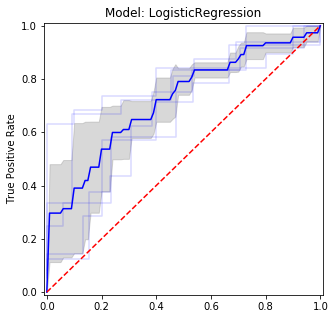

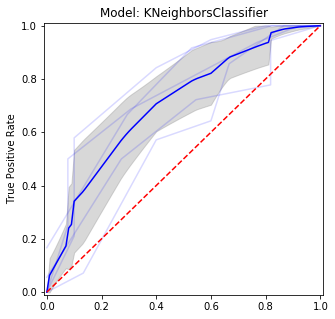

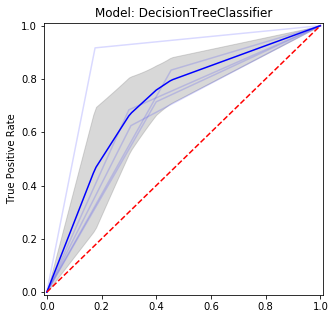

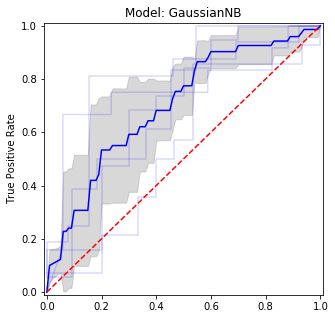

In [490]:
for name, model in models:
    get_eval_ROC(model,X_new_t,Y_train)

Model: Pipeline
ROC: 0.760 (0.274)
True Positive Rate: 0.723 , False Positive Rate: 0.392

Model: Pipeline
ROC: 0.760 (0.241)
True Positive Rate: 0.763 , False Positive Rate: 0.513

Model: Pipeline
ROC: 0.726 (0.281)
True Positive Rate: 0.657 , False Positive Rate: 0.436

Model: Pipeline
ROC: 0.697 (0.300)
True Positive Rate: 0.774 , False Positive Rate: 0.445



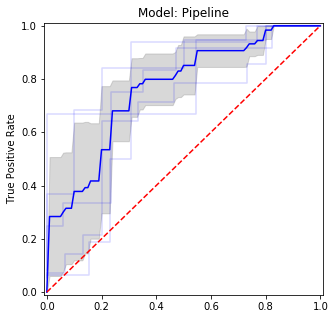

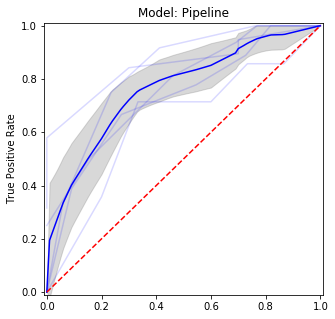

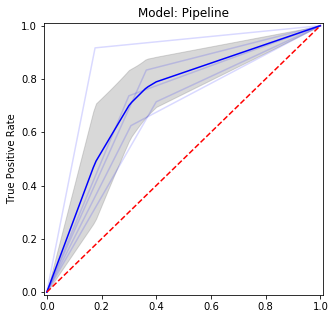

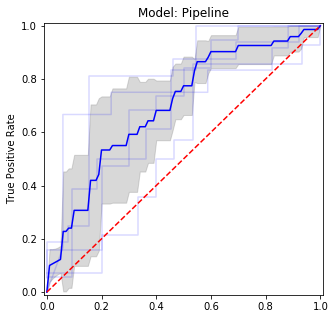

In [491]:
for name, model in pipelines:
    get_eval_ROC(model,X_new_t,Y_train)

Model: AdaBoostClassifier
ROC: 0.775 (0.298)
True Positive Rate: 0.773 , False Positive Rate: 0.346

Model: GradientBoostingClassifier
ROC: 0.864 (0.226)
True Positive Rate: 0.807 , False Positive Rate: 0.300

Model: RandomForestClassifier
ROC: 0.808 (0.280)
True Positive Rate: 0.689 , False Positive Rate: 0.446

Model: ExtraTreesClassifier
ROC: 0.847 (0.225)
True Positive Rate: 0.816 , False Positive Rate: 0.385



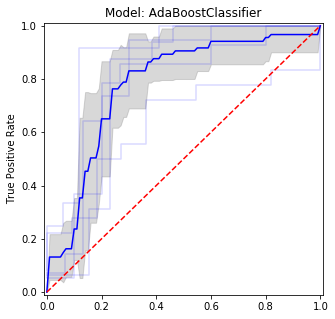

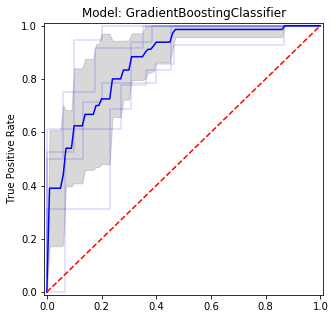

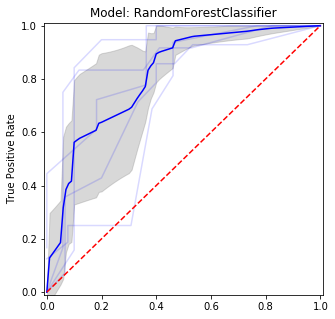

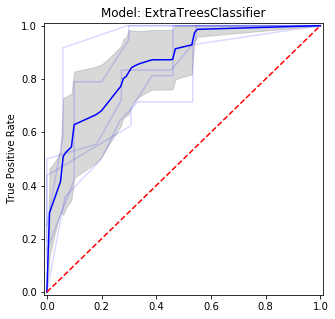

In [492]:
for name, model in ensembles:
    get_eval_ROC(model,X_new_t,Y_train)


 Model: AdaBoostClassifier
ROC: 0.889 (0.116)
True Positive Rate: 0.889 , False Positive Rate: 0.357

 Model: GradientBoostingClassifier
ROC: 0.979 (0.107)
True Positive Rate: 0.979 , False Positive Rate: 0.389

 Model: RandomForestClassifier
ROC: 0.939 (0.149)
True Positive Rate: 0.939 , False Positive Rate: 0.308

 Model: ExtraTreesClassifier
ROC: 0.904 (0.205)
True Positive Rate: 0.904 , False Positive Rate: 0.209


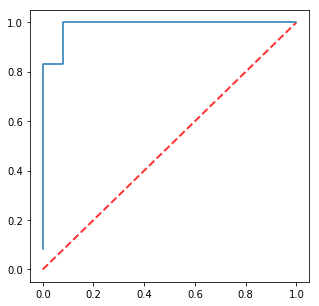

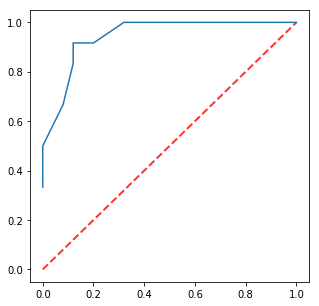

In [493]:
for name, model in ensembles:
    get_val_ROC(model,X_new_t,X_new_v,Y_train,Y_validation)


 Model: GradientBoostingClassifier
ROC: 0.979 (0.107)
True Positive Rate: 0.979 , False Positive Rate: 0.396


0.9785478547854787

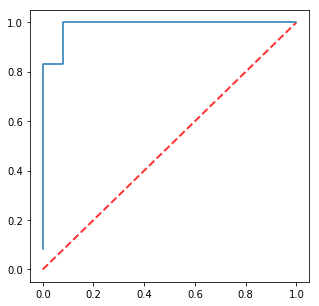

In [497]:
get_val_ROC(GradientBoostingClassifier(),X_new_t,X_new_v,Y_train,Y_validation)

Accuracy:0.918918918918919
Model:GradientBoostingClassifier


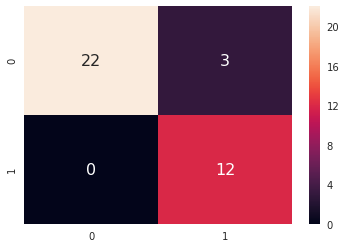

In [538]:
get_cm(GradientBoostingClassifier(),X_new_t,Y_train,X_new_v,Y_validation)

In [494]:
get_eval_ROC(randomforestgrid(X_new_t,Y_train),X_new_t,Y_train)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 20}
Best score:  0.8669129720853859
Model: RandomForestClassifier
ROC: 0.840 (0.259)
True Positive Rate: 0.795 , False Positive Rate: 0.327




 Model: RandomForestClassifier
ROC: 0.947 (0.155)
True Positive Rate: 0.947 , False Positive Rate: 0.376


0.9471947194719472

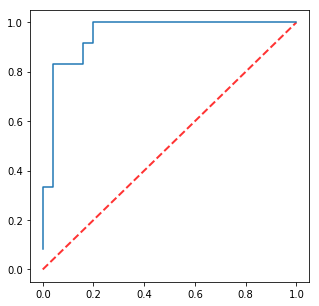

In [499]:
get_val_ROC(RandomForestClassifier(max_depth = 5,min_samples_leaf = 2, n_estimators = 20),X_new_t,X_new_v,Y_train,Y_validation)

Accuracy:0.8378378378378378
Model:RandomForestClassifier


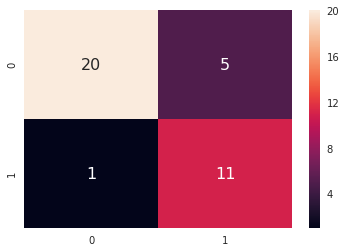

In [539]:
get_cm(RandomForestClassifier(max_depth = 5,min_samples_leaf = 2, n_estimators = 20),X_new_t,Y_train,X_new_v,Y_validation)

In [563]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 5,min_samples_leaf = 2, n_estimators = 20).fit(X_new_t,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_new_t)
shap_values = explainer.shap_values(X_new_v)

Using 145 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 37/37 [05:19<00:00,  8.63s/it]


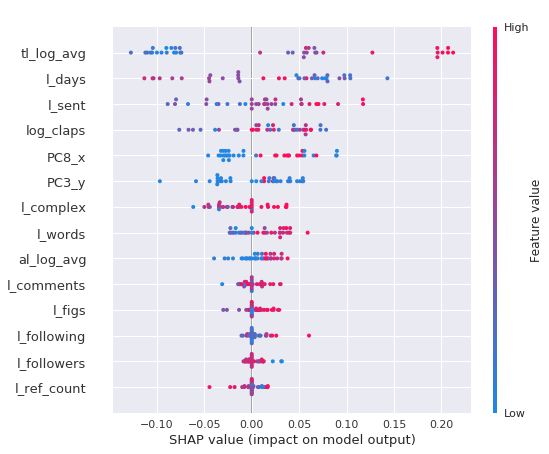

In [564]:
shap.summary_plot(shap_values[0],X_new_v)

In [565]:
shap_values = shap.TreeExplainer(rf).shap_values(X_new_t)


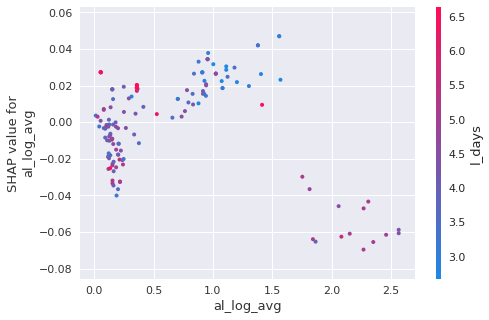

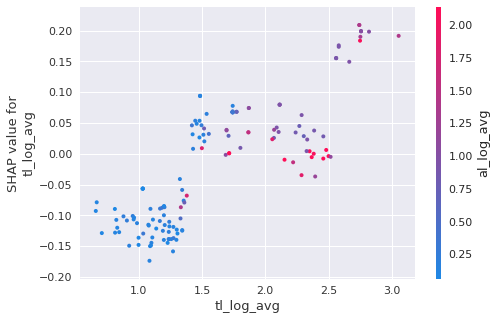

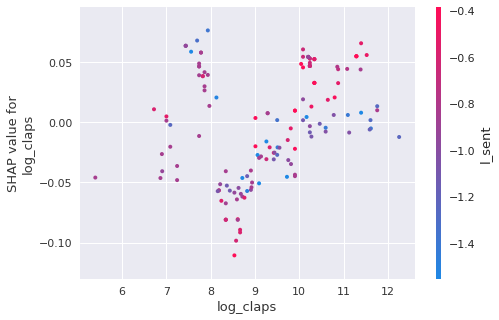

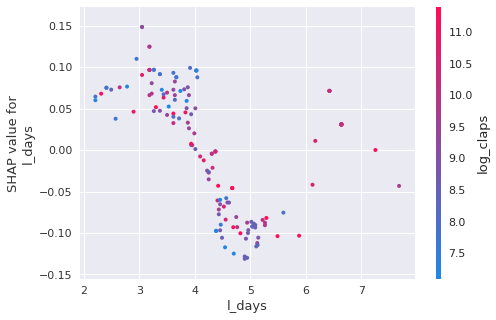

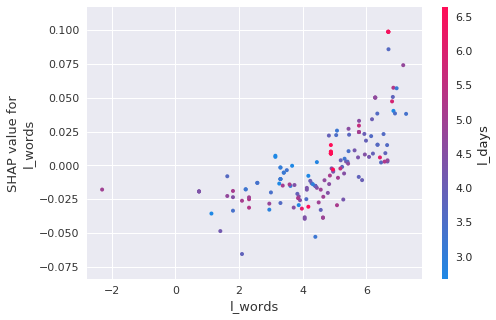

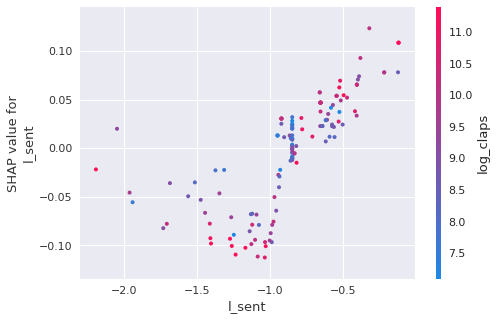

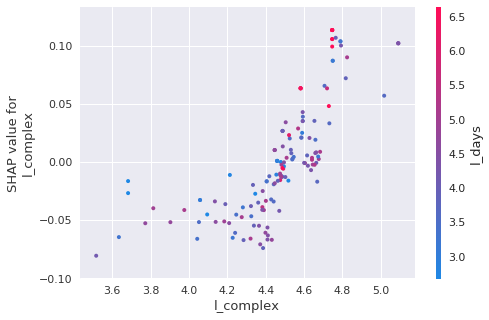

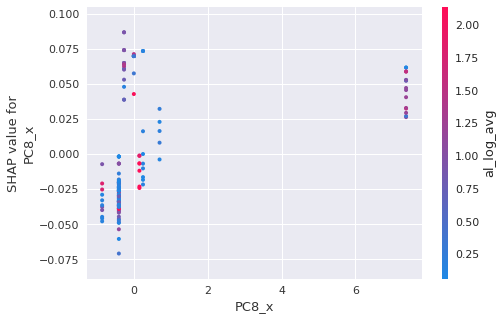

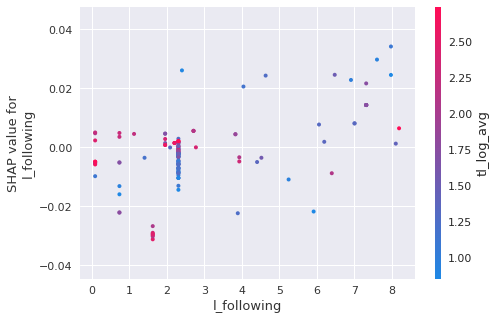

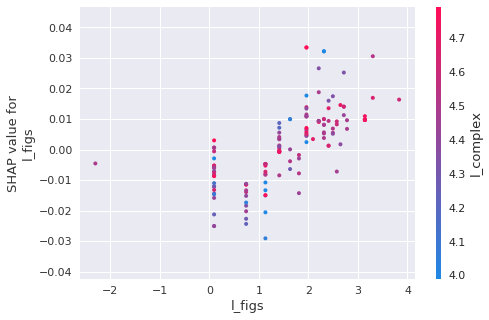

In [566]:
for x in X_new_t.columns:
    shap.dependence_plot(x,shap_values[0],X_new_t)

In [503]:
shap.dependence_plot("al_log_avg", shap_values[0], X_new_t)


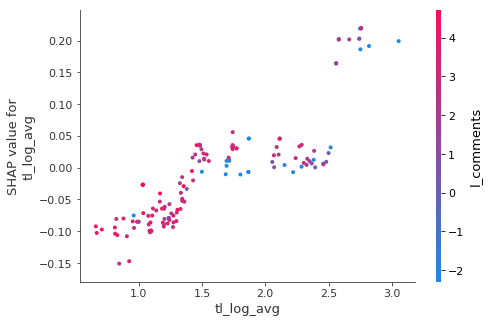

In [504]:
shap.dependence_plot("tl_log_avg", shap_values[0], X_new_t)


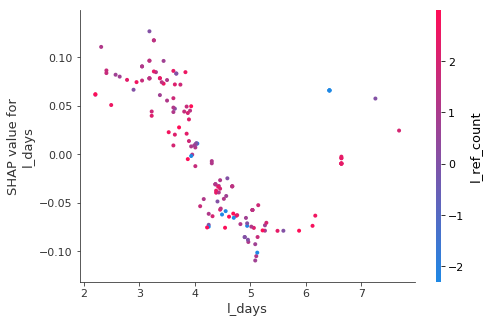

In [505]:
shap.dependence_plot("l_days", shap_values[0], X_new_t)


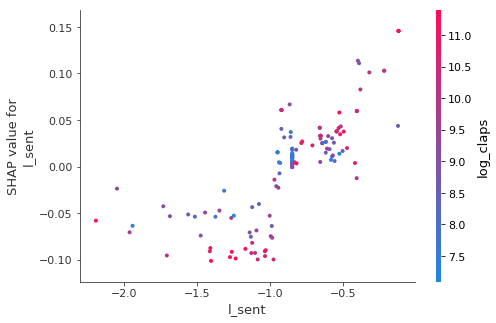

In [506]:
shap.dependence_plot("l_sent", shap_values[0], X_new_t)


In [507]:
shap.dependence_plot("l_words", shap_values[0], X_new_t)


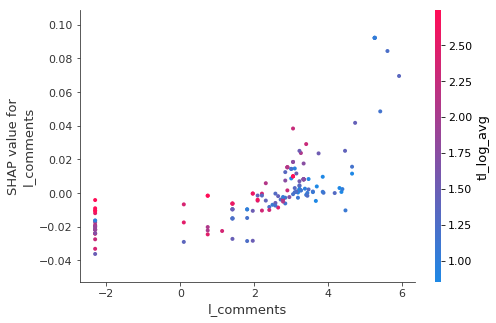

In [508]:
shap.dependence_plot("l_comments", shap_values[0], X_new_t)


In [269]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators = 9).fit(X_train,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_train)
shap_values = explainer.shap_values(X_validation)

Using 181 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 46/46 [17:42<00:00, 23.10s/it]


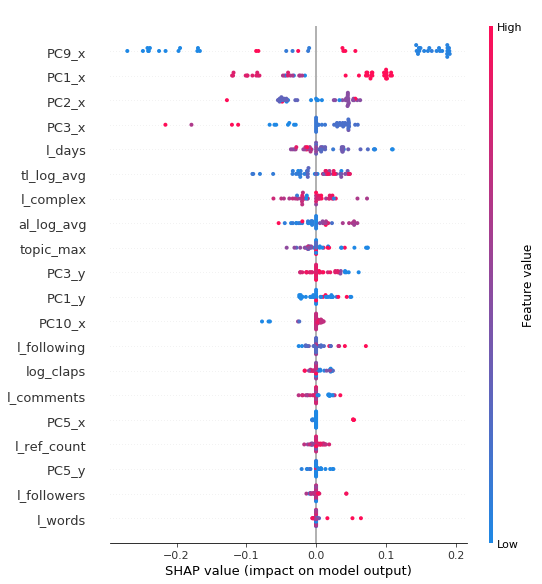

In [270]:
shap.summary_plot(shap_values[0],X_validation)


 Model: RandomForestClassifier
ROC: 0.988 (0.099)
True Positive Rate: 0.988 , False Positive Rate: 0.358


0.9883517763541061

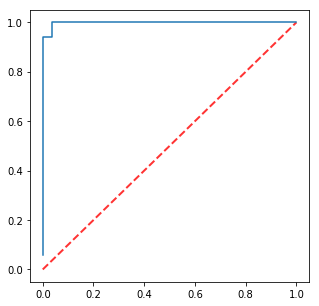

In [272]:
get_val_ROC(rf,X_train, X_validation, Y_train, Y_validation)

In [541]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_total,Y_total)
explainer = shap.KernelExplainer(rf.predict_proba,X_total)
shap_values = explainer.shap_values(X_total)

Using 182 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 182/182 [32:20<00:00, 10.66s/it]


In [273]:
X_train.columns

Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'title_sent_max', 'PC1_x',
       'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x',
       'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y',
       'PC8_y', 'PC9_y', 'PC10_y', 'log_claps', 'l_comments', 'l_days',
       'l_figs', 'l_ref_count', 'l_words', 'l_followers', 'l_following',
       'l_sent', 'l_complex'],
      dtype='object')

In [311]:
X_validation.columns

Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'title_sent_max', 'PC1_x',
       'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x',
       'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y',
       'PC8_y', 'PC9_y', 'PC10_y', 'log_claps', 'l_comments', 'l_days',
       'l_figs', 'l_ref_count', 'l_words', 'l_followers', 'l_following',
       'l_sent', 'l_complex'],
      dtype='object')

In [521]:
X_total = X_new_t.append(X_new_v,ignore_index = True)

In [522]:
Y_total = Y_train.append(Y_validation, ignore_index = True)

Model: RandomForestClassifier
ROC: 0.885 (0.206)
True Positive Rate: 0.948 , False Positive Rate: 0.305



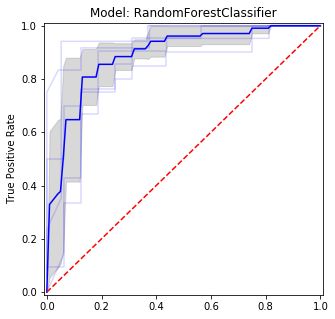

In [525]:
model = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators=9)
get_eval_ROC(model,X_total,Y_total)

In [562]:
model.score(X_total,Y_total)

0.9615384615384616

In [541]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_total,Y_total)
explainer = shap.KernelExplainer(rf.predict_proba,X_total)
shap_values = explainer.shap_values(X_total)

Using 182 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 182/182 [32:20<00:00, 10.66s/it]


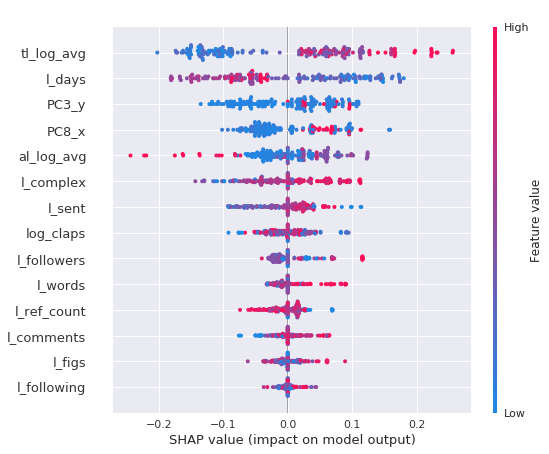

In [542]:
shap.summary_plot(shap_values[0],X_total)

In [543]:
shap_values = shap.TreeExplainer(rf).shap_values(X_total)


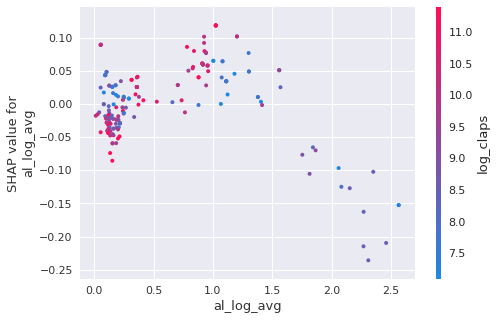

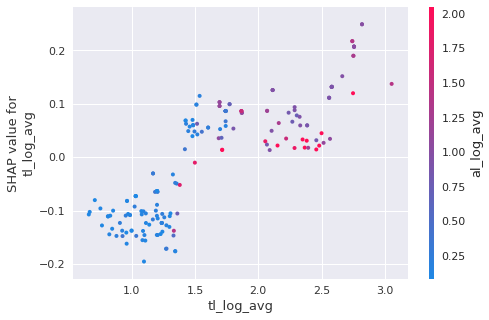

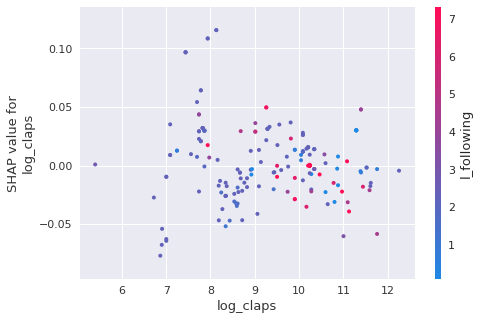

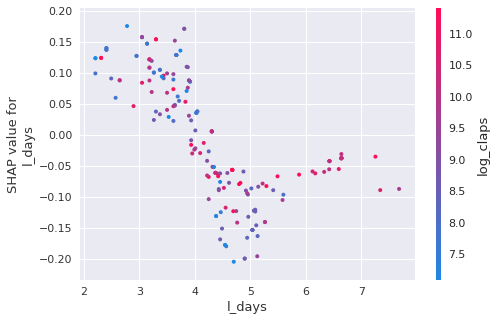

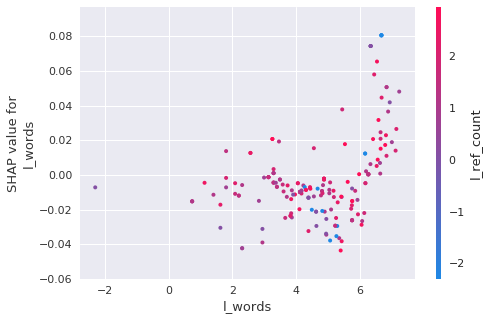

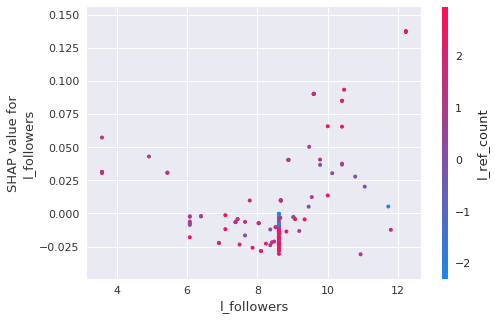

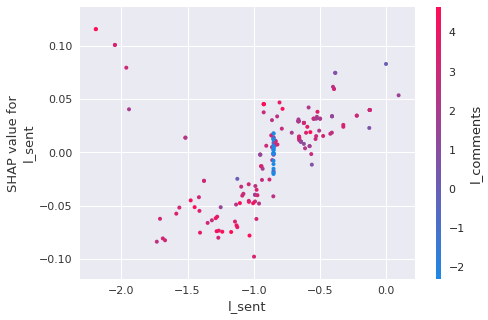

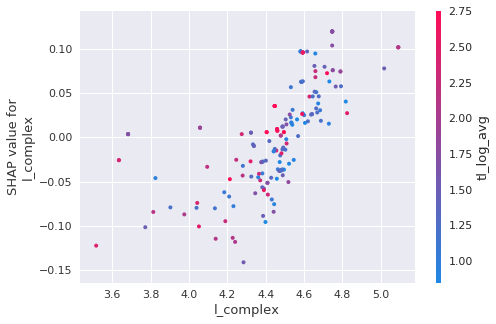

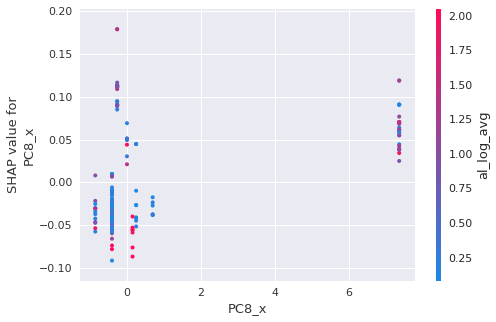

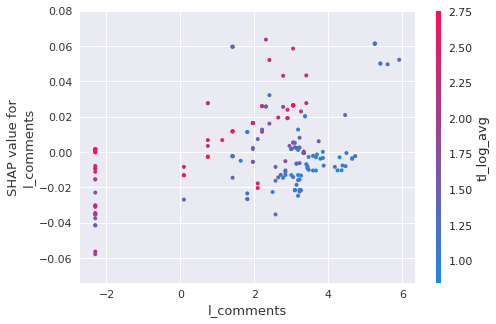

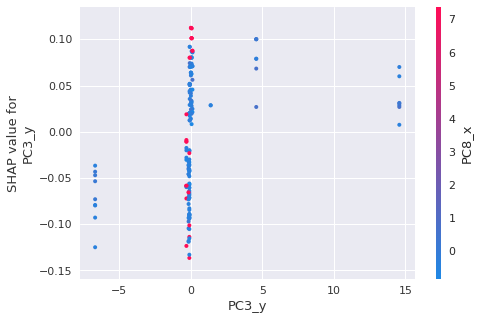

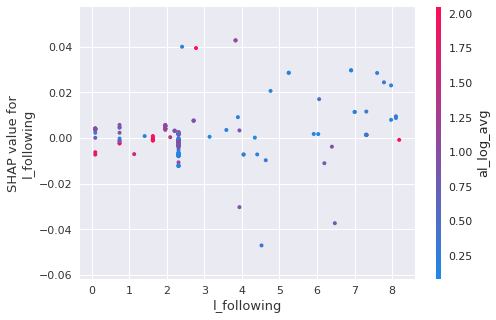

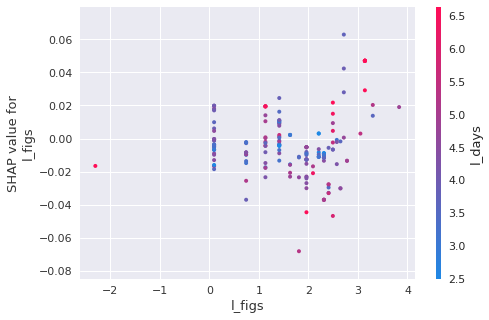

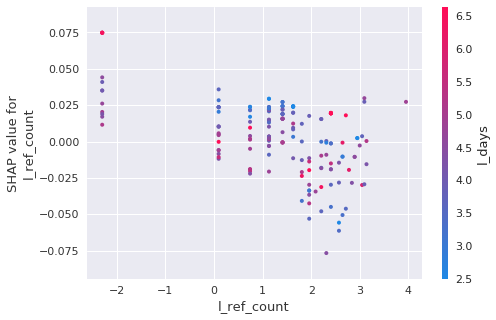

In [544]:
for x in X_total.columns:
    shap.dependence_plot(x, shap_values[0], X_total)


In [545]:
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_total)


In [546]:
shap.summary_plot(shap_interaction_values[0], X_total)


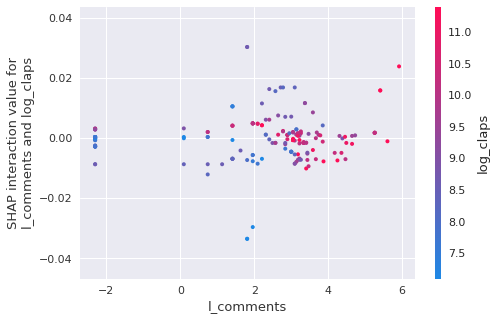

In [547]:
shap.dependence_plot(
    ("l_comments", "log_claps"),
    shap_interaction_values[0], X_total
)

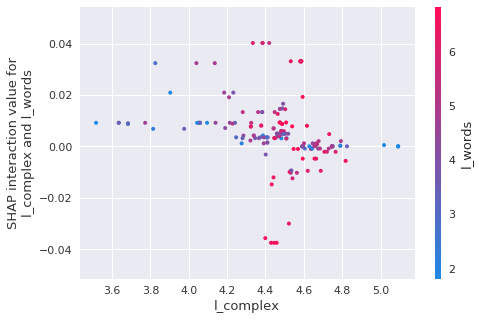

In [549]:
shap.dependence_plot(
    ("l_complex", "l_words"),
    shap_interaction_values[0], X_total
)

In [557]:
df[df['title']=='Chatbotswerethenextbigthingwhathappened']

title      Author  Claps_max  topic_max  \
19  Chatbotswerethenextbigthingwhathappened  Justin Lee    18300.0          1   

    al_log_avg  author_loyalty_avg  comments_max  complex_max  days_open_max  \
19    0.136511             1.16171            40       123.59             48   

    figures_max   ...     ref_count_max  sent_max  tl_log_avg  \
19            7   ...                22  0.288614    0.813019   

    topic_loyalty_avg  success_avg  success_len  words_max  title_sent_max  \
19           3.118333         0.25           20        731             0.0   

               top_ref  Success  
19  blog.growthbot.org        1  

[1 rows x 22 columns]

In [559]:
data[data['l_words']>6].l_words

8      6.660703
11     7.246439
15     6.349314
19     6.594550
24     6.538285
31     6.849172
32     6.996773
41     7.015802
42     6.082447
43     6.642617
44     6.571023
45     7.156255
51     6.064018
52     6.304632
54     6.609484
55     6.693448
68     6.847049
74     6.652992
77     7.132577
85     6.548362
88     6.009059
92     6.148682
95     6.663260
103    6.948993
110    6.650408
116    6.687233
118    6.897806
120    6.829902
122    6.425031
125    6.184355
131    6.342297
133    6.276831
134    6.276831
135    6.276831
140    6.204760
141    6.460061
143    6.176075
144    6.805833
147    6.660703
Name: l_words, dtype: float64

In [558]:
np.log(731)

6.594413459749778